<br>
<img src="https://sites.google.com/a/chesterqualls.com/chester-qualls-is-it/ChesterQualls%20Logo%28small%29.png?revision=2">
<br>
***
# EDU Work Analyzing Data in R

> *This Notebook takes code from an early R program to see how it works in Jupyter.

In [2]:
library(tidyverse)
library(stringr)
library(dplyr)
library(sqldf)
library(Deducer) #error loading dependencies, look into it


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.2     v dplyr   0.7.4
v tidyr   0.8.0     v stringr 1.3.0
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite
Loading required package: JGR
Loading required package: rJava
Error: package or namespace load failed for 'rJava':
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: fun(libname, pkgname)
  error: No CurrentVersion entry in Software/JavaSoft registry! Try re-installing Java and make sure R and Java have matching architectures.


ERROR: Error: package 'rJava' could not be loaded


In [3]:
setwd("C:/Users/Chester Qualls/Desktop/Customers/EDU_Example")

In [4]:
#The following lines of code are commented out because I don't want to choose the files.
#dAssess <- read.csv(file.choose(),header = TRUE,
#      na = c("NULL", "NA"))
#dDiscipline <- read.csv(file.choose(),header = TRUE)

dAssess <- read.csv("CRI Student Data/A Mind_Cohort 1_Assess.csv",header = TRUE,
      na = c("NULL", "NA"))

dDiscipline <- read.csv("CRI Student Data/A Mind_Cohort 1_Discipline.csv",header = TRUE)

In [5]:
dAssess

X,researchid,districtcode,districtname,schoolcode,schoolname,b2cpilot,b2ccohort1,ayd_ia_c1_comp,ayd__ia_cohort_1,...,assessment_name,standard_met_ind,testtype,performancelevel,attempt,testgrade,foreign,scalescore,score,subject
0,975341,37501,Beaumont School District,4515,Pima High School,,,NA,y,...,Spring Test Administration,Yes,BIO,L4,TS,10,0,423,NA,EOC Biology
1,641757,4246,Westside School District,2134,Globe High School,,,NA,y,...,Winter Test Administration,No,BIO,L2,TS,10,0,396,NA,EOC Biology
2,641757,4246,Westside School District,2134,Globe High School,,,NA,y,...,Spring Test Administration,No,BIO,L2,TS,10,0,392,NA,EOC Biology
3,641757,4246,Westside School District,2134,Globe High School,,,NA,y,...,Spring Test Administration,Yes,GEO,L3,TS,10,0,411,NA,EOC Math Year 2
4,641757,4246,Westside School District,2134,Globe High School,,,NA,y,...,Spring Test Administration,No,SBA,L2,TS,11,0,2536,NA,Smarter Balanced ELA
5,274092,22009,Richgrove School District,2478,Page Middle-Senior High School,,,NA,y,...,Spring Test Administration,Yes,MSP,L3,TS,8,0,411,NA,Science
6,274092,22009,Richgrove School District,2478,Page Middle-Senior High School,,,NA,y,...,Spring Test Administration,No,SBA,L2,TS,8,0,2544,NA,Smarter Balanced ELA
7,274092,22009,Richgrove School District,2478,Page Middle-Senior High School,,,NA,y,...,Spring Test Administration,No,SBA,L2,TS,8,0,2569,NA,Smarter Balanced Math
8,943735,37507,Mt Baldy School District,2343,Ponderosa Senior High,,,NA,y,...,Spring Test Administration,Yes,BIO,L4,TS,10,0,428,NA,EOC Biology
9,521222,37501,Beaumont School District,2553,Salame High School,,,NA,y,...,Spring Test Administration,,SBA,,PP,NA,0,NA,NA,Smarter Balanced ELA


In [6]:
summary(dAssess)

       X           researchid       districtcode  
 Min.   :    0   Min.   :     51   Min.   : 4019  
 1st Qu.:24450   1st Qu.: 320775   1st Qu.:22009  
 Median :48900   Median : 647993   Median :31332  
 Mean   :48900   Mean   : 642388   Mean   :28073  
 3rd Qu.:73349   3rd Qu.: 960928   3rd Qu.:37501  
 Max.   :97799   Max.   :1285074   Max.   :39207  
                                                  
                        districtname     schoolcode  
 Beaumont School District     :26790   Min.   :2134  
 Franklin School District     :11812   1st Qu.:2623  
 Westside School District     :11404   Median :3201  
 Walnut Valley Public Schools : 8817   Mean   :3301  
 Golden Plains School District: 7642   3rd Qu.:3648  
 Belmont School District      : 6708   Max.   :5324  
 (Other)                      :24627                 
                    schoolname    b2cpilot  b2ccohort1 ayd_ia_c1_comp
 Globe High School       :11404    :83384    :73102    Mode:logical  
 Williams High Schoo

In [7]:
summary (dAssess$districtname)

Beaumont School District         Belmont School District 
                          26790                            6708 
       Franklin School District   Golden Plains School District 
                          11812                            7642 
         Gorman School District          Manson School District 
                           3137                            2042 
Manteca Unified School District        Mt Baldy School District 
                            802                            2769 
          Ophir School District       Richgrove School District 
                           1687                            1688 
 Travis Unified School District    Walnut Valley Public Schools 
                           3484                            8817 
      Waterford School District        Westside School District 
                           3419                           11404 
       Westwood School District 
                           5599

In [8]:
names (dAssess)

[1] "X"                "researchid"       "districtcode"     "districtname"    
 [5] "schoolcode"       "schoolname"       "b2cpilot"         "b2ccohort1"      
 [9] "ayd_ia_c1_comp"   "ayd__ia_cohort_1" "sourcedataset"    "homebased"       
[13] "privateschool"    "reportinggrade"   "schoolyear"       "assessment_name" 
[17] "standard_met_ind" "testtype"         "performancelevel" "attempt"         
[21] "testgrade"        "foreign"          "scalescore"       "score"           
[25] "subject"

In [37]:
attach (dAssess)
summary(score)

NumScore <- as.numeric(score)
summary (NumScore)

The following objects are masked from dAssess (pos = 4):

    assessment_name, attempt, ayd__ia_cohort_1, ayd_ia_c1_comp,
    b2ccohort1, b2cpilot, districtcode, districtname, foreign,
    homebased, performancelevel, privateschool, reportinggrade,
    researchid, scalescore, schoolcode, schoolname, schoolyear, score,
    sourcedataset, standard_met_ind, subject, testgrade, testtype, X



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   14.00   21.00   21.72   29.00   45.00   68461 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   14.00   21.00   21.72   29.00   45.00   68461 

In [46]:
#count (NumScore)
mean (score)

[1] NA

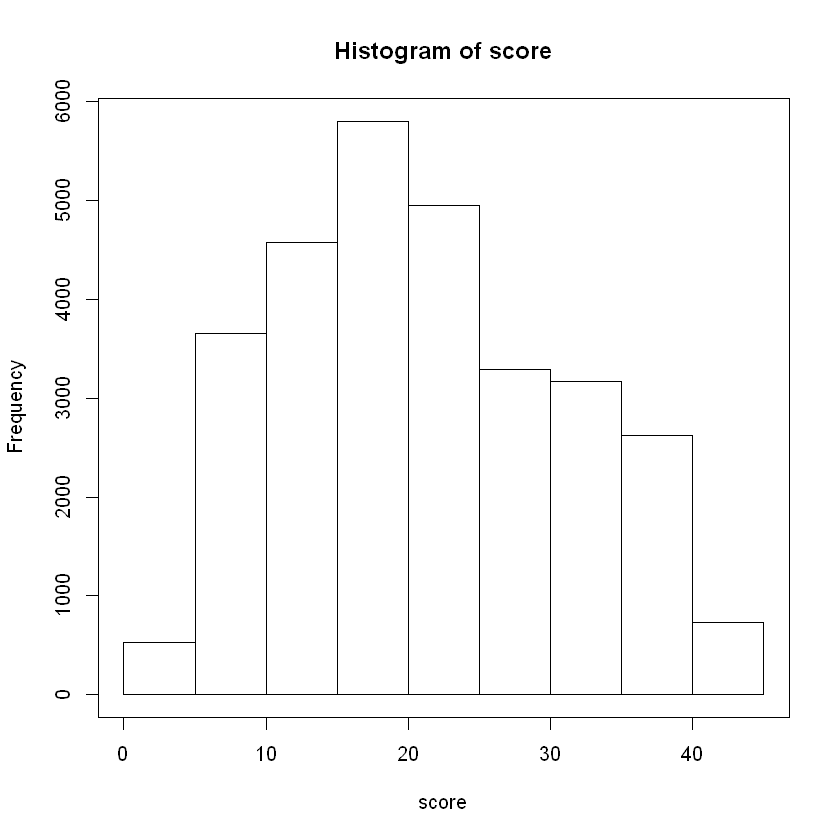

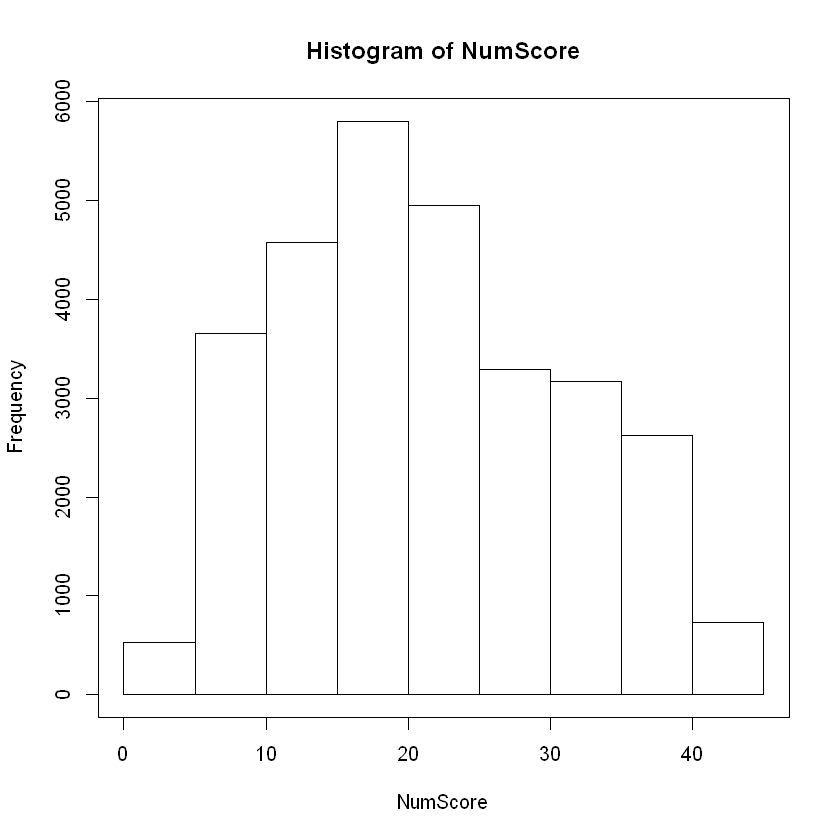

In [22]:
hist(score)
box()
hist(NumScore)
box()

In [26]:
Mean_SD_bySchool_dplyr <- dAssess %>%
  group_by(schoolname) %>%
  summarize(Score_Mean = mean(score,na.rm=TRUE), Score_SD = sd(score,na.rm=TRUE))

Mean_SD_bySchool_SQL <- sqldf("SELECT dAssess.schoolname, 
  avg(Case When dAssess.score='NA' Or dAssess.score='NULL' Then dAssess.score = Null Else 
    dAssess.score End) as AVGScore,
  stdev(Case When dAssess.score='NA' Or dAssess.score='NULL' Then dAssess.score = Null Else 
    dAssess.score End) as SDScore
  FROM dAssess 
  GROUP BY dAssess.schoolname;")

In [27]:
Mean_SD_bySchool_dplyr

schoolname,Score_Mean,Score_SD
Benson Middle-High School,19.79138,9.464392
Chinle High School,21.04898,10.068904
Duncan Middle School,24.86128,9.980672
Fort Thomas High School,20.01088,8.747588
Ganado High School,17.28779,8.091407
Globe High School,21.21433,9.855954
Greyhills Middle School,22.96070,10.052546
Liberty High School,26.55763,10.155662
Mount Graham High School,22.40446,9.556063
New Horizon Entry Program,14.09091,6.579583


In [32]:
summary(Mean_SD_bySchool_dplyr)

                     schoolname   Score_Mean       Score_SD     
 Benson Middle-High School: 1   Min.   :14.09   Min.   : 6.580  
 Chinle High School       : 1   1st Qu.:20.01   1st Qu.: 8.748  
 Duncan Middle School     : 1   Median :22.03   Median : 9.530  
 Fort Thomas High School  : 1   Mean   :21.26   Mean   : 9.210  
 Ganado High School       : 1   3rd Qu.:22.96   3rd Qu.: 9.881  
 Globe High School        : 1   Max.   :26.56   Max.   :10.720  
 (Other)                  :19                                   

In [28]:
Mean_SD_bySchool_SQL

schoolname,AVGScore,SDScore
Benson Middle-High School,19.79138,9.464392
Chinle High School,21.04898,10.068904
Duncan Middle School,24.86128,9.980672
Fort Thomas High School,20.01088,8.747588
Ganado High School,17.28779,8.091407
Globe High School,21.21433,9.855954
Greyhills Middle School,22.96070,10.052546
Liberty High School,26.55763,10.155662
Mount Graham High School,22.40446,9.556063
New Horizon Entry Program,14.09091,6.579583


In [47]:
summary(Mean_SD_bySchool_SQL)

                     schoolname    AVGScore        SDScore      
 Benson Middle-High School: 1   Min.   :14.09   Min.   : 6.580  
 Chinle High School       : 1   1st Qu.:20.01   1st Qu.: 8.748  
 Duncan Middle School     : 1   Median :22.03   Median : 9.530  
 Fort Thomas High School  : 1   Mean   :21.26   Mean   : 9.210  
 Ganado High School       : 1   3rd Qu.:22.96   3rd Qu.: 9.881  
 Globe High School        : 1   Max.   :26.56   Max.   :10.720  
 (Other)                  :19                                   

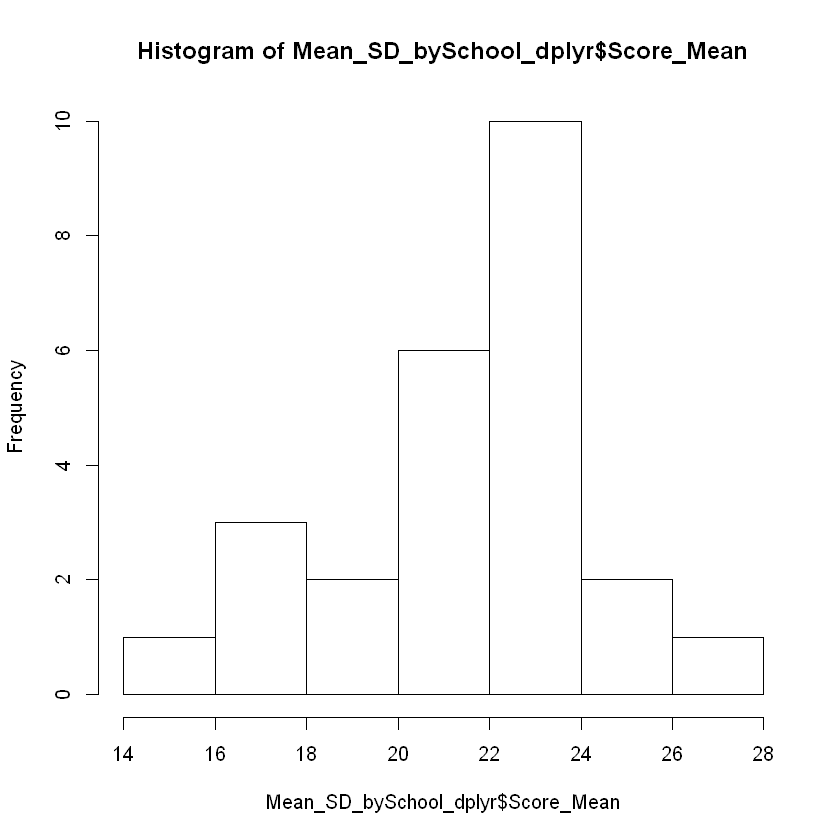

In [33]:
hist(Mean_SD_bySchool_dplyr$Score_Mean)

In [34]:
getwd()

[1] "C:/Users/Chester Qualls/Desktop/Customers/EDU_Example"